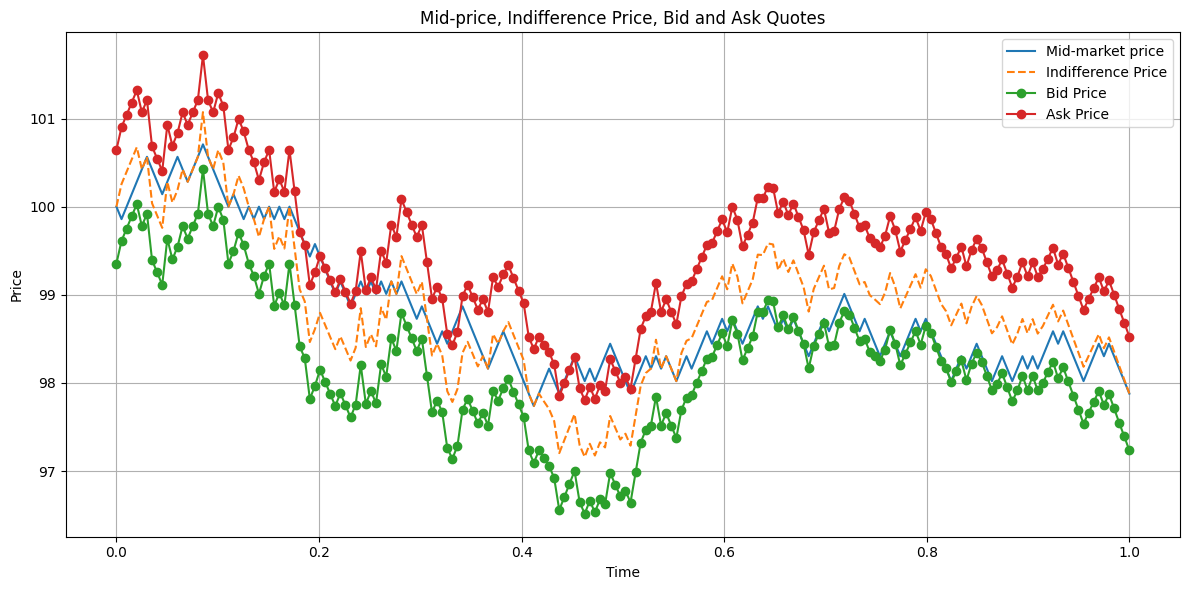

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
s0 = 100         # Precio inicial
T = 1.0          # Horizonte temporal
sigma = 2.0      # Volatilidad
dt = 0.005       # Paso de tiempo
q = 0            # Inventario inicial
gamma = 0.1      # Aversión al riesgo
k = 1.5          # Parámetro de ejecución
A = 140          # Escala de intensidad

n_steps = int(T / dt)
time_grid = np.linspace(0, T, n_steps)

# Inicialización de variables
mid_prices = [s0]
inventory = [q]
wealth = [0.0]
indifference_prices = []
bid_quotes = []
ask_quotes = []

# Función para calcular precios de reserva
def reservation_price(s, q, gamma, sigma, T, t):
    return s - q * gamma * sigma**2 * (T - t)

# Función para calcular el spread óptimo
def optimal_spread(gamma, k):
    return (2 / gamma) * np.log(1 + gamma / k)

# Simulación
s = s0
w = 0.0
q = 0

for i, t in enumerate(time_grid):
    r = reservation_price(s, q, gamma, sigma, T, t)
    spread = optimal_spread(gamma, k)
    delta = spread / 2
    ask = r + delta
    bid = r - delta

    # Probabilidad de ejecución
    lambda_a = A * np.exp(-k * delta)
    lambda_b = A * np.exp(-k * delta)

    # Eventos de ejecución de órdenes
    if np.random.rand() < lambda_a * dt:
        q -= 1
        w += s + delta
    if np.random.rand() < lambda_b * dt:
        q += 1
        w -= s - delta

    # Actualización de precio
    s += sigma * np.sqrt(dt) * np.random.choice([-1, 1])

    # Registro de variables
    mid_prices.append(s)
    inventory.append(q)
    wealth.append(w)
    indifference_prices.append(r)
    bid_quotes.append(bid)
    ask_quotes.append(ask)

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(time_grid, mid_prices[:-1], label='Mid-market price')
plt.plot(time_grid, indifference_prices, label='Indifference Price', linestyle='--')
plt.plot(time_grid, bid_quotes, label='Bid Price', marker= 'o')
plt.plot(time_grid, ask_quotes, label='Ask Price', marker= 'o')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Mid-price, Indifference Price, Bid and Ask Quotes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


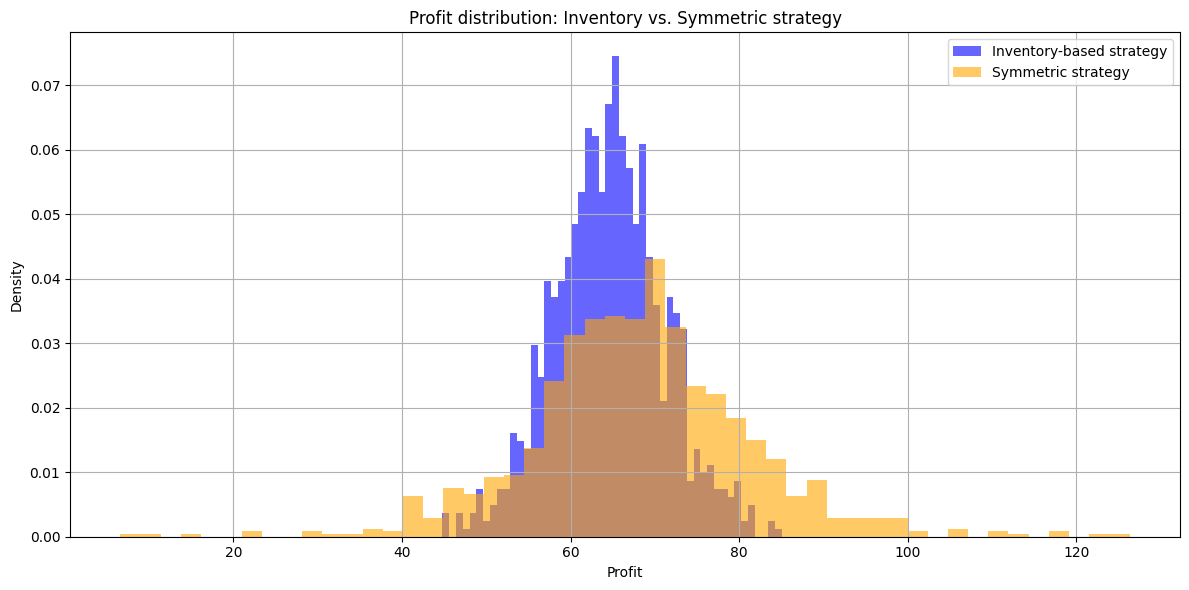

In [2]:
# Reimportar librerías tras el reset
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
s0 = 100      # precio inicial
T = 1         # tiempo total
dt = 0.005    # paso de tiempo
sigma = 2     # volatilidad
gamma = 0.1   # aversión al riesgo
k = 1.5       # parámetro de intensidad
A = 140       # intensidad base
n_steps = int(T / dt)
n_simulations = 1000

# Funciones auxiliares
def lambda_func(delta):
    """Intensidad de ejecución como función exponencial"""
    return A * np.exp(-k * delta)

def optimal_quotes(q, gamma, sigma, T, t, k):
    """Cotizaciones óptimas para el agente averso al riesgo"""
    tau = T - t
    theta2 = gamma * sigma**2 * tau / 2
    delta = (1 / gamma) * np.log(1 + gamma / k)
    delta_a = delta + theta2 - q * gamma * sigma**2 * tau
    delta_b = delta + theta2 + q * gamma * sigma**2 * tau
    return delta_a, delta_b

def simulate_strategy(sym=False):
    profits = []
    for _ in range(n_simulations):
        s = s0
        q = 0
        x = 0
        for i in range(n_steps):
            t = i * dt
            tau = T - t
            delta_a, delta_b = optimal_quotes(q, gamma, sigma, T, t, k)

            if sym:
                delta_base = (1 / gamma) * np.log(1 + gamma / k) + gamma * sigma**2 * tau / 2
                delta_a = delta_b = delta_base

            la = lambda_func(delta_a)
            lb = lambda_func(delta_b)

            # probabilidad de ejecución
            if np.random.rand() < la * dt:
                q -= 1
                x += s + delta_a
            if np.random.rand() < lb * dt:
                q += 1
                x -= s - delta_b

            # actualizar precio mid
            s += sigma * np.sqrt(dt) * np.random.choice([-1, 1])
        profits.append(x + q * s)
    return np.array(profits)

# Simulaciones
profits_inventory = simulate_strategy(sym=False)
profits_symmetric = simulate_strategy(sym=True)

# Histogramas comparativos
plt.figure(figsize=(12, 6))
plt.hist(profits_inventory, bins=50, alpha=0.6, label='Inventory-based strategy', color='blue', density=True)
plt.hist(profits_symmetric, bins=50, alpha=0.6, label='Symmetric strategy', color='orange', density=True)
plt.title('Profit distribution: Inventory vs. Symmetric strategy')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
